# HOUSES REGISTRATION. Load Data

In [1]:
NewHousesReg <- read.csv('NewHouseRegistrations_Ireland.csv')

Load information

In [2]:
print(head(NewHousesReg))
class(NewHousesReg)

  ï..Year NewHouseRegistrations
1    1978                  3781
2    1979                  5565
3    1980                  9609
4    1981                 10785
5    1982                  9448
6    1983                 10830


[1] "data.frame"

In [3]:
str(NewHousesReg)

'data.frame':	42 obs. of  2 variables:
 $ ï..Year              : int  1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 ...
 $ NewHouseRegistrations: int  3781 5565 9609 10785 9448 10830 10422 8819 8249 7099 ...


In [4]:
is.ts(NewHousesReg)

[1] FALSE

In [5]:
names(NewHousesReg)[1] <- "Year"

In [6]:
str(NewHousesReg)

'data.frame':	42 obs. of  2 variables:
 $ Year                 : int  1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 ...
 $ NewHouseRegistrations: int  3781 5565 9609 10785 9448 10830 10422 8819 8249 7099 ...


In [7]:
NewHouses <- ts(NewHousesReg[,2], start=c(1978,1), frequency=1)


In [8]:
is.ts(NewHouses)

[1] TRUE

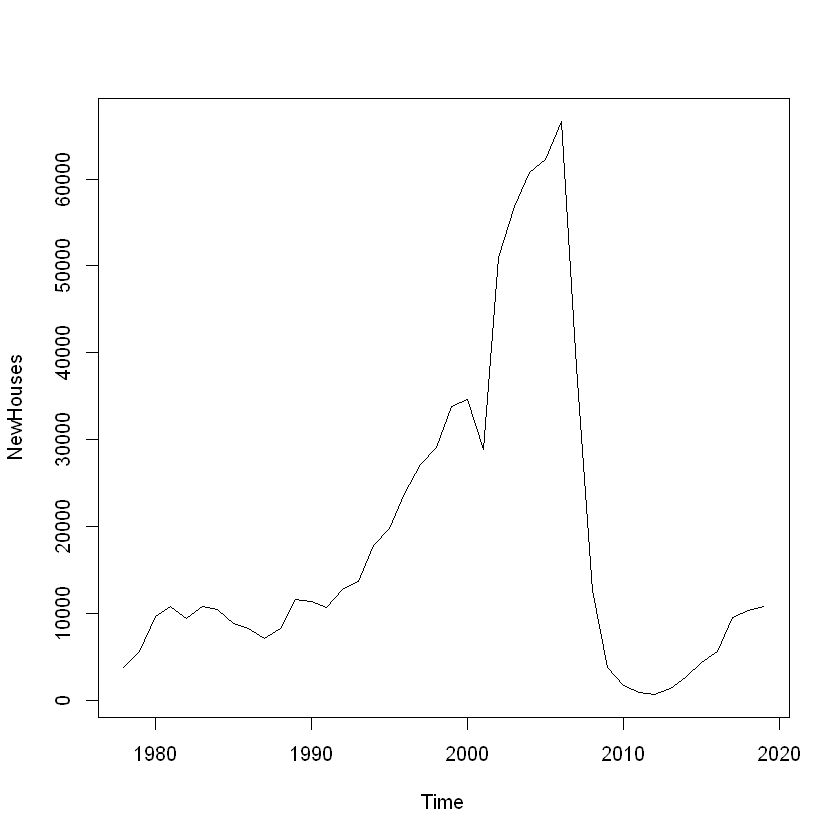

In [9]:
plot(NewHouses)

In [10]:
class(NewHouses)

[1] "ts"

In [11]:
frequency(NewHouses)

[1] 1

In [12]:
start(NewHouses)

[1] 1978    1

In [13]:
end(NewHouses)

[1] 2019    1

In [14]:
cycle(NewHouses)

A Time Series:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1

In [15]:
time(NewHouses)

A Time Series:
 [1] 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
[16] 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
[31] 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

In [16]:
library('fpp2')
library('forecast')
library('tseries')

Warning message:
"package 'fpp2' was built under R version 4.0.5"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.3     v fma       2.4  
v forecast  8.14      v expsmooth 2.3  





# Somoothing Time series

In [17]:
adf.test(NewHouses)


	Augmented Dickey-Fuller Test

data:  NewHouses
Dickey-Fuller = -2.1252, Lag order = 3, p-value = 0.5243
alternative hypothesis: stationary


Compute yearly averages

In [18]:
NH_avg <- aggregate(NewHouses, FUN=mean)
NH_avg

A Time Series:
 [1]  3781  5565  9609 10785  9448 10830 10422  8819  8249  7099  8297 11627
[13] 11346 10658 12748 13666 17822 19727 23769 27080 29067 33852 34613 28845
[25] 51017 56859 60782 62284 66649 38351 12676  3743  1680   834   627  1326
[37]  2574  4297  5626  9466 10265 10784

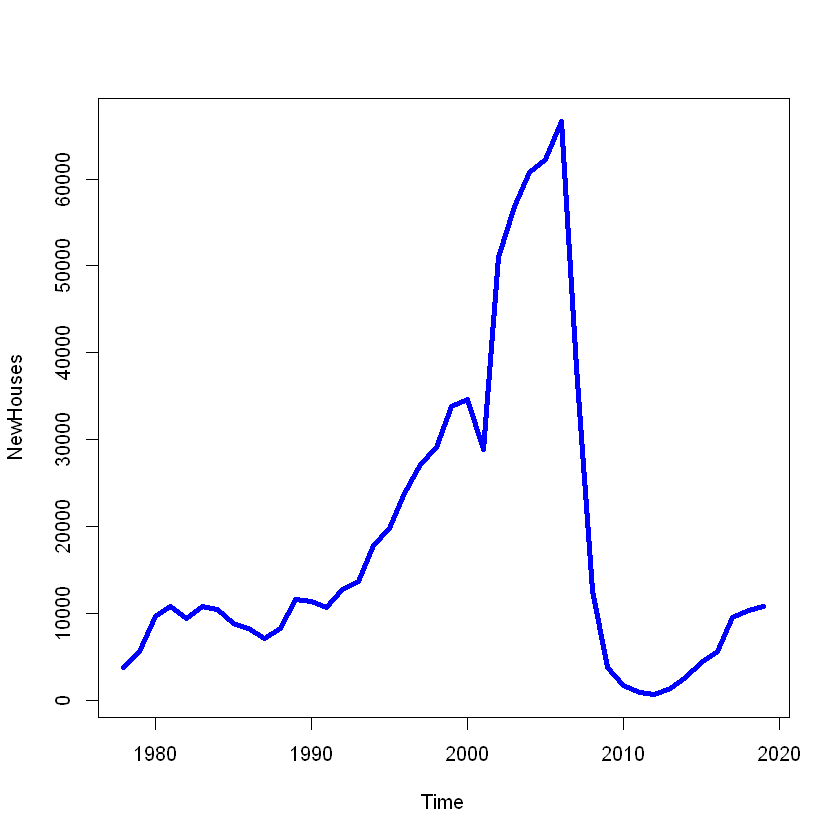

In [19]:
plot(NewHouses, col='red')
lines(NH_avg, col='blue', lw=4)

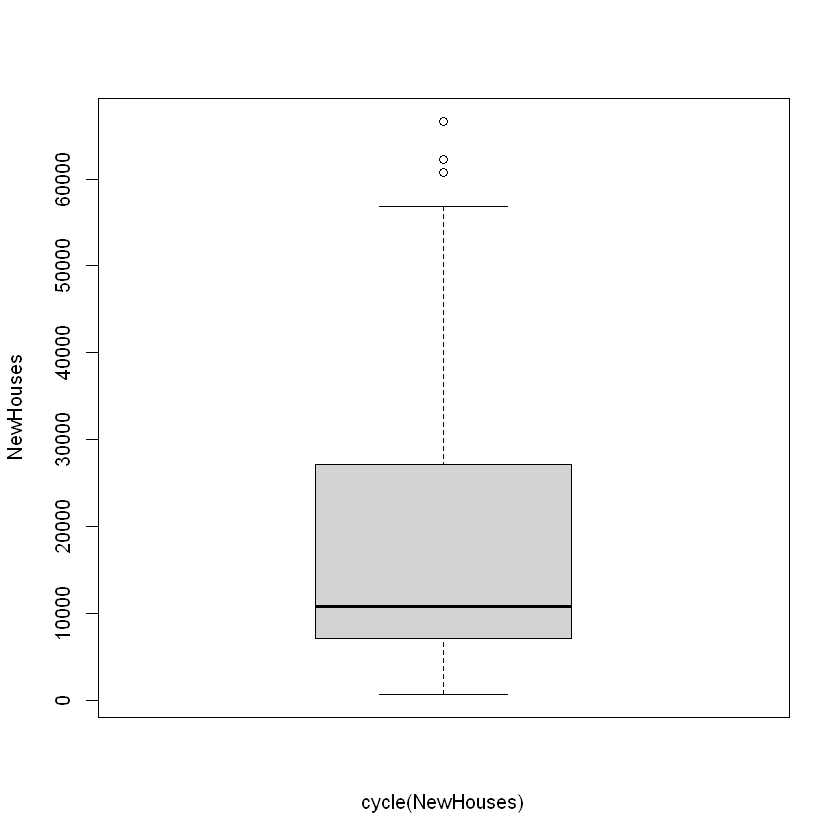

In [20]:
boxplot(NewHouses ~ cycle(NewHouses))

## Moving Average

In [21]:
ma(NewHouses, order=5)

A Time Series:
 [1]      NA      NA  7837.6  9247.4 10218.8 10060.8  9553.6  9083.8  8577.2
[10]  8818.2  9323.6  9805.4 10935.2 12009.0 13248.0 14924.2 17546.4 20412.8
[19] 23493.0 26699.0 29676.2 30691.4 35478.8 41037.2 46423.2 51957.4 59518.2
[28] 56985.0 48148.4 36740.6 24619.8 11456.8  3912.0  1642.0  1408.2  1931.6
[37]  2890.0  4657.8  6445.6  8087.6      NA      NA

In [22]:
ma(NewHouses, order=10)

A Time Series:
 [1]       NA       NA       NA       NA       NA  8686.50  9215.40  9605.35
 [9]  9685.85  9844.50 10151.30 10663.10 11578.50 12899.90 14674.95 16712.50
[17] 18862.25 21136.85 23209.55 26032.35 30105.45 34413.10 38688.95 42960.80
[25] 45668.35 45412.35 43087.35 39935.25 36888.05 32968.00 27671.85 21984.80
[33] 16175.05 10224.55  5729.15  4164.35  4395.85       NA       NA       NA
[41]       NA       NA

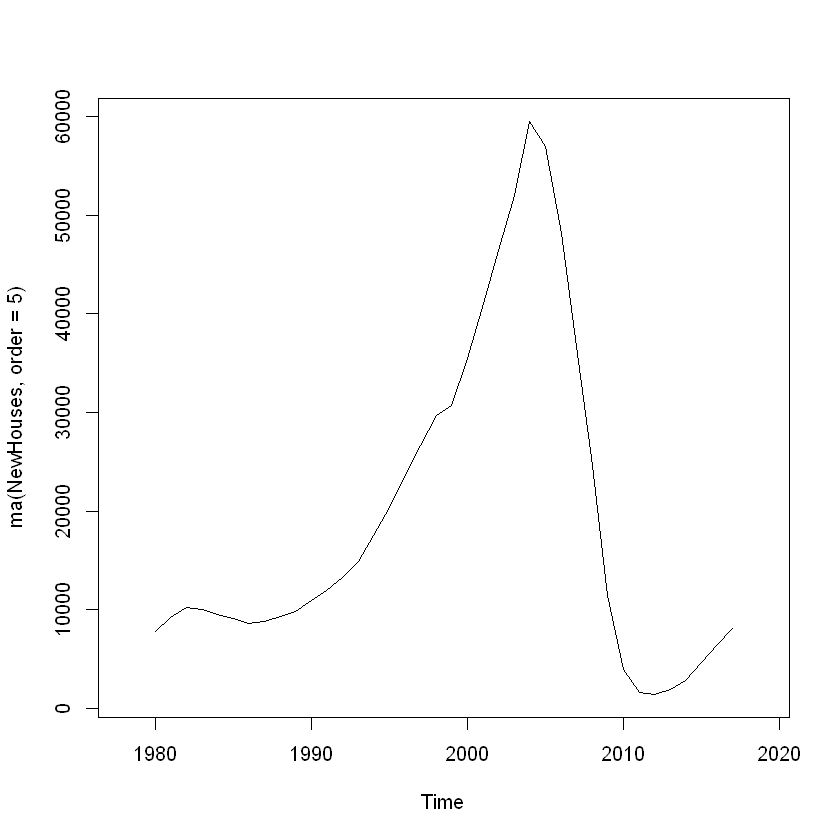

In [23]:
plot(ma(NewHouses, order = 5))

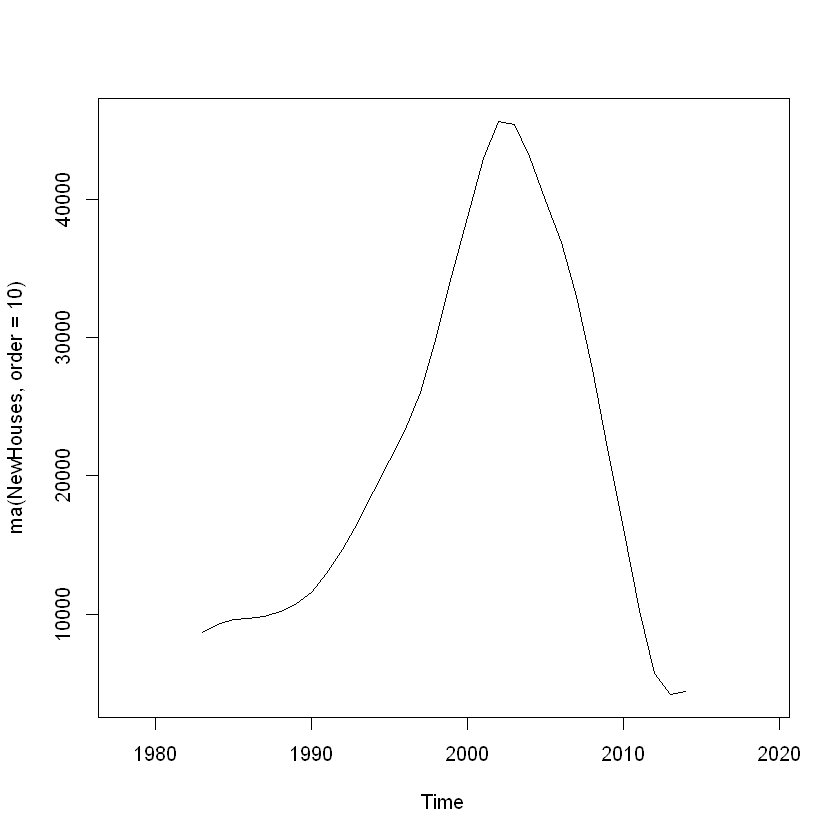

In [24]:
plot(ma(NewHouses, order = 10))

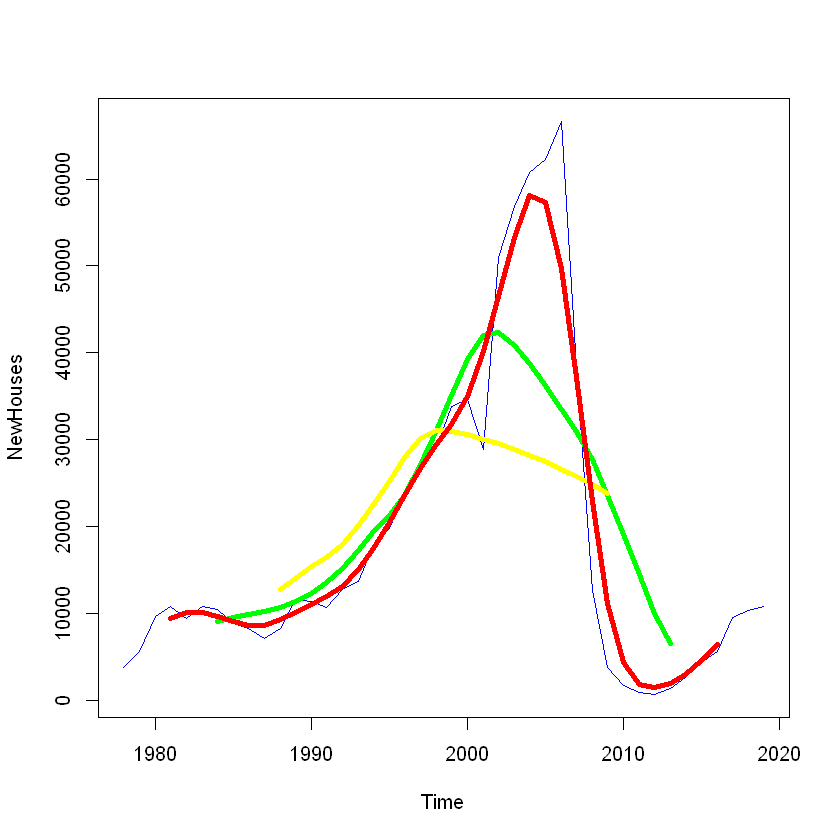

In [25]:
plot(NewHouses, col='blue')
x <- as.vector(time(NewHouses))
y <- ma(NewHouses, order=12)
#lines(x, y, col='black', lw=4)

y <- ma(NewHouses, order=12)
lines(x, y, col='green', lw=4)

y <- ma(NewHouses, order=8)
#lines(x, y, col='darkgreen', lw=4)

y <- ma(NewHouses, order=6)
#lines(x, y, col='orange', lw=4)

y <- ma(NewHouses, order=5)
#lines(x, y, col='green', lw=4)

y <- ma(NewHouses, order=4)
#lines(x, y, col='pink', lw=4)

y <- ma(NewHouses, order=20)
lines(x, y, col='yellow', lw=4)

y <- ma(ma(NewHouses, order=4),order=2)
lines(x, y, col='red', lw=4)

legend(1, 95, legend=c("Red", "Green", "Yellow"),
       col=c("red", "blue"), lty=1:2, cex=0.8,
       title="Line types", text.font=4, bg='lightblue')

# Linear Model

In [26]:
NH_LM <- lm(NewHouses ~ time(NewHouses))

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""coll" is not a graphical parameter"


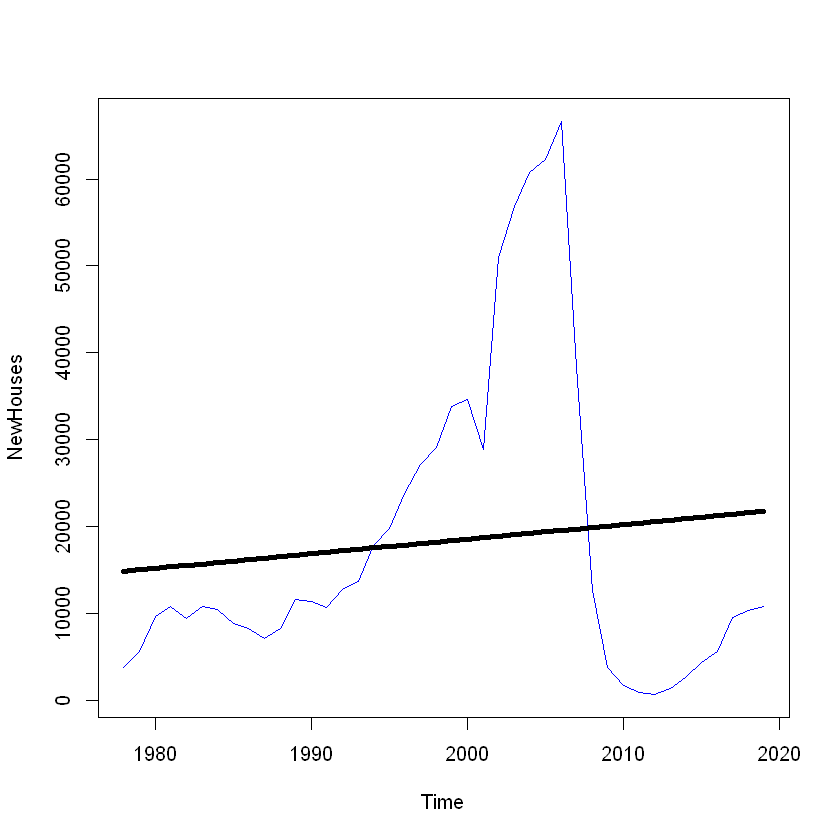

In [27]:
plot(NewHouses, col='blue')
x <- as.vector(time(NewHouses))
y <- predict.lm(NH_LM)
lines(x, y, coll='red', lw=4)

# Seasonal Decomposition

In [28]:
NH_fit_mult <- decompose(NewHouses, type = 'multiplicative')
plot(NH_fit_mult)

ERROR: Error in decompose(NewHouses, type = "multiplicative"): time series has no or less than 2 periods


In [ ]:
NH_fit_add <- decompose(NewHouses, type = 'additive')
plot(NH_fit_mult)

In [ ]:
components(NewHouses)

# Forecast

## Forecasting using Mean Model

In [ ]:
fcst.mean <- meanf(NewHouses, h=3)
fcst.mean

In [ ]:
plot(fcst.mean)

In [ ]:
summary(fcst.mean)

In [ ]:
names(fcst.mean)

## Forecasting using naive method

In [ ]:
fcst.naive <- naive(NewHouses, h=3)
fcst.naive

In [ ]:
plot(fcst.naive)

In [ ]:
summary(fcst.naive)

In [ ]:
fcst.snaive <- snaive(NewHouses, h=10)
fcst.snaive

In [ ]:
plot(fcst.snaive)

## Forecast using Drift Model

In [ ]:
fcst.drift <- rwf(NewHouses, h=3, drift = TRUE)
fcst.drift

In [ ]:
plot(fcst.drift)

In [ ]:
summary(fcst.drift)

## Forecasting using Simple Exponential Smoothing

In [ ]:
?ses

In [ ]:
fcst.ese <- ses(NewHouses, h=3)
fcst.ese


In [ ]:
plot(fcst.ese)

In [ ]:
summary(fcst.ese)

In [ ]:
autoplot(fcst.ese)+autolayer(fitted(fcst.ese), series = 'Fitted')

In [ ]:
y <- ma(NewHouses, order=10)
autoplot(fcst.ese)+autolayer(fitted(fcst.ese), series = 'Fitted')

## Forecasting using ETS

### Model='ZZZ'

In [ ]:
ets.fit <- ets(NewHouses, model='ZZZ')
ets.fit

In [ ]:
summary(ets.fit)

In [ ]:
plot(ets.fit)

In [ ]:
plot(forecast(ets.fit, h=3))

In [ ]:
fct.ses = forecast(ets.fit, h=3)

In [ ]:
summary(fct.ses)

In [ ]:
ets.fit$fitted

### Model='ANN'

In [ ]:
ets.fit.ann <- ets(NewHouses, model='ANN')
ets.fit.ann

In [ ]:
summary(ets.fit.ann)

In [ ]:
plot(ets.fit.ann)

In [ ]:
plot(forecast(ets.fit.ann, h=3))

In [ ]:
summary(forecast(ets.fit.ann, h=3))

### Model='AAN'

Equivalent to Holt Linear exponential smoothing. When there is linear tren and no seasonality

In [ ]:
ets.fit.aan <- ets(NewHouses, model='AAN')
ets.fit.aan

In [ ]:
summary(ets.fit.aan)

In [ ]:
plot(ets.fit.aan)

In [ ]:
?ets

In [ ]:
plot(forecast(ets.fit.aan, h=3))


In [ ]:
summary(forecast(ets.fit.aan, h=3))

## Accuracy of forecasts

In [ ]:
print(accuracy(fcst.mean))
print(accuracy(fcst.naive))
print(accuracy(fcst.snaive))
print(accuracy(fcst.drift))
print(accuracy(fcst.ese))
print(accuracy(ets.fit))
print(accuracy(ets.fit.ann))
print(accuracy(ets.fit.aan))

# Window

## Create Window series 

In [31]:
subNH <- window(NewHouses, start = 1978, end= 2006)

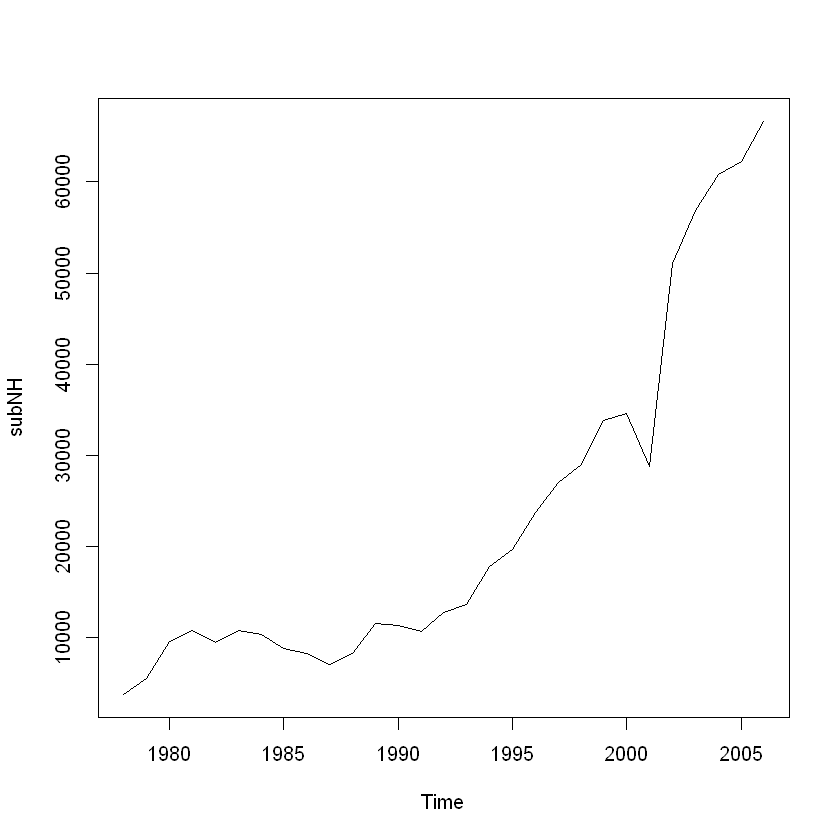

In [32]:
plot(subNH)

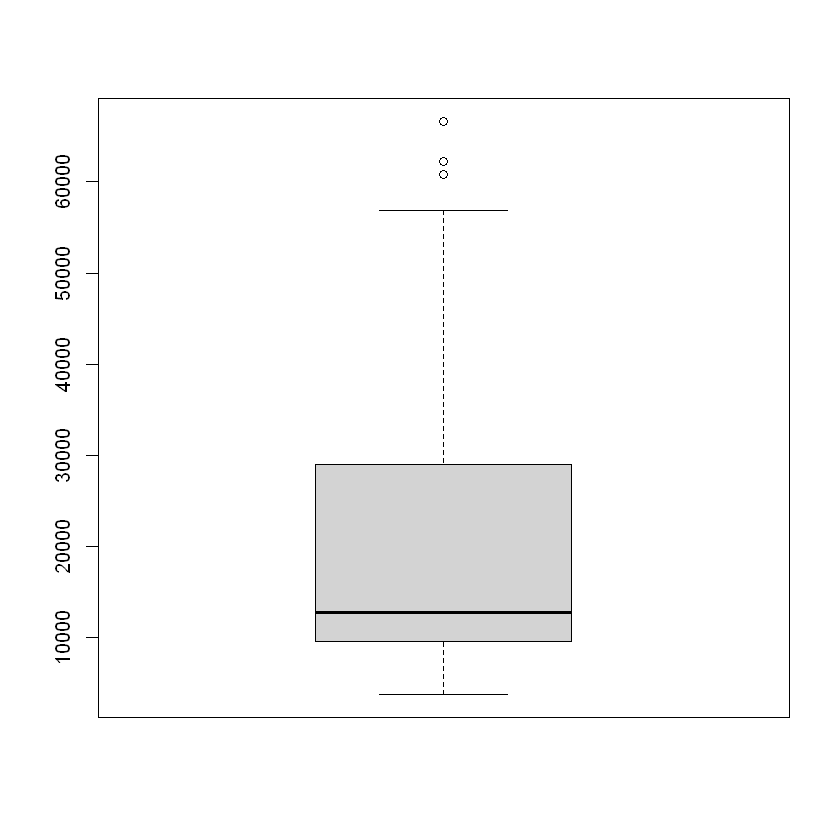

In [33]:
boxplot(subNH)

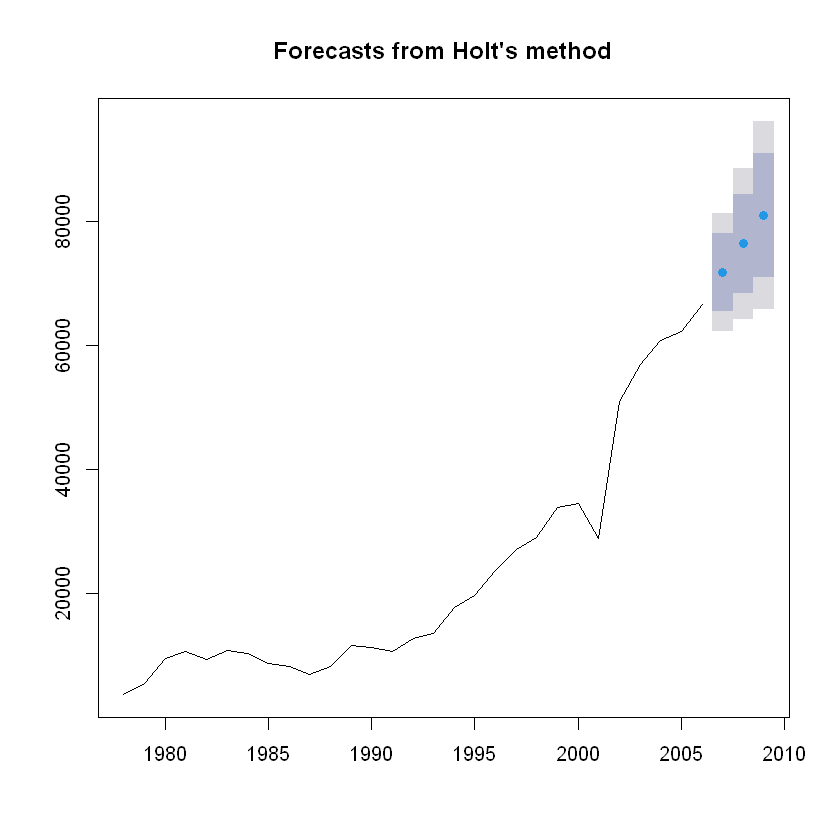

In [34]:
plot(holt(subNH, h=3))

Smoothed out version of the curve. Two equations for level and slope

In [35]:
# 3 years forecast
Holt.fcst.window = holt(subNH, h=3)

In [36]:
accuracy(Holt.fcst.window)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,874.3065,4502.276,2888.344,-1.317716,17.28546,0.9351932,0.04080714


Holt Model: Exponential Somoothing model with a trend and without the season

## Create linear model

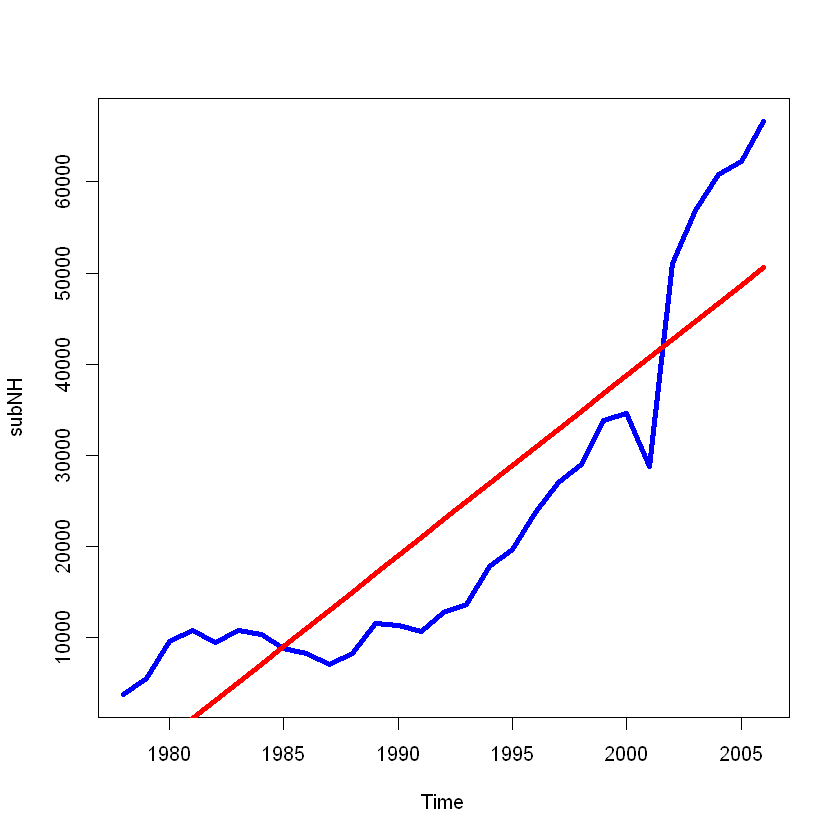

In [37]:
window.LM <- lm(subNH ~ time(subNH))
plot(subNH, col='blue', lw=4)
x <- as.vector(time(subNH))
y <- predict.lm(window.LM)
lines(x, y, col='red', lw=4)

In [38]:
mean(residuals(window.LM))

[1] -1.963181e-13

## Contruct a Holt Model

In [39]:
year <- 3
HM <- holt(subNH, h=year)


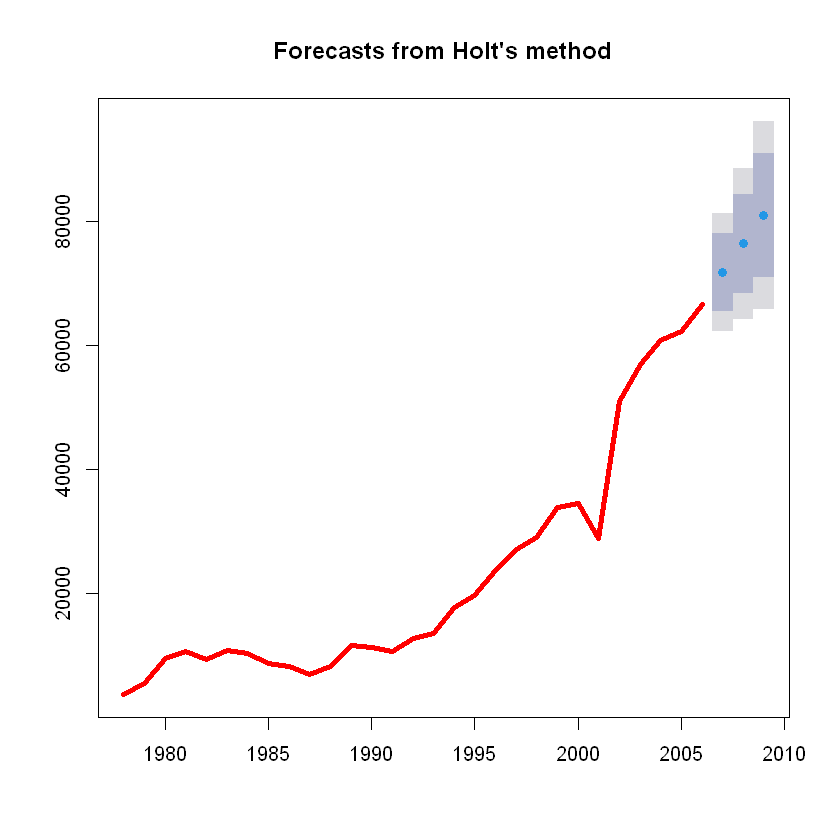

In [40]:
plot(HM, lw=4, col='red')

### Overlay original data with HM

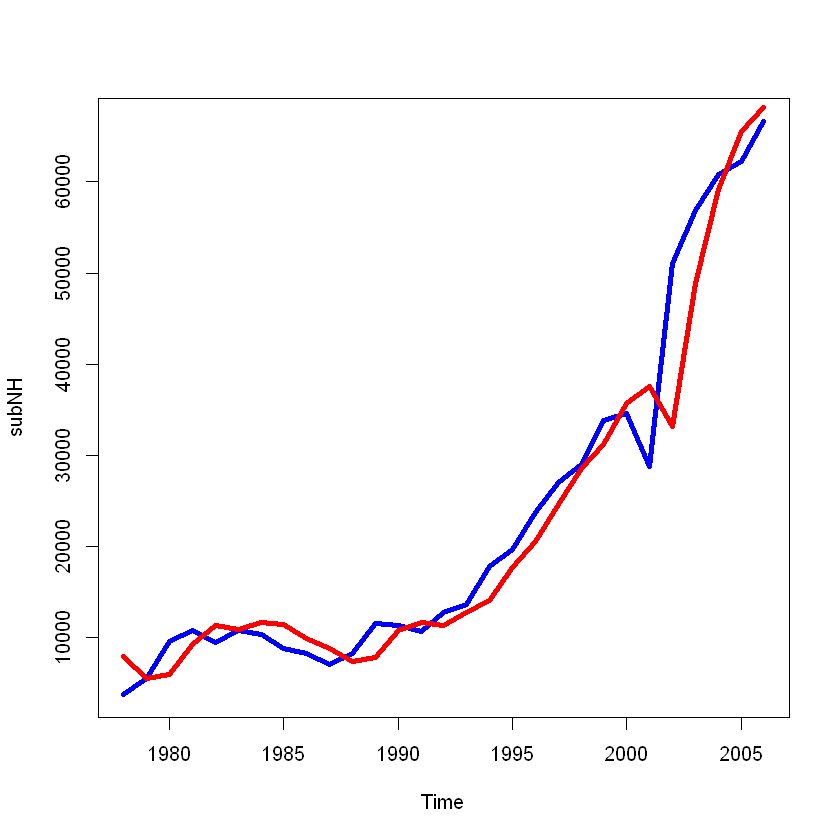

In [41]:
plot(subNH, col='blue', lw=4)
x <- as.vector(time(subNH))
y <- as.vector(HM$fitted)
lines(x,y, col='red', lw=4)

Smoothed version

### Overlay between Holt Model and Linear Model

In [42]:
predict <- function (t, model) {window.LM$coefficients[[1]]+t*(window.LM$coefficients[[2]])}

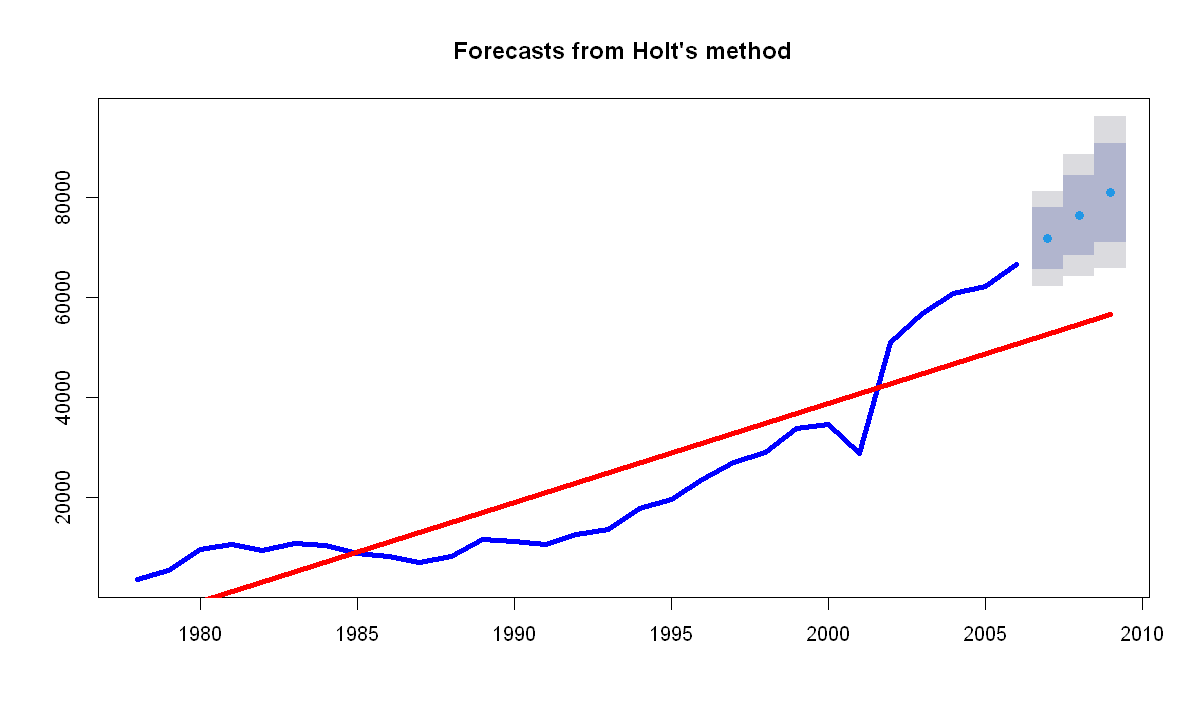

In [51]:
years=3
HM <- holt(subNH, h=years)
plot(HM, col='blue', lw=4)
x <- c(start(subNH)[1], end(subNH)[1] + years)
y <- predict(x)
lines(x, y, col='red', lw=4)


          

In [44]:
HM

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2007       71750.48 65536.11 77964.85 62246.42 81254.54
2008       76334.88 68361.43 84308.33 64140.54 88529.22
2009       80919.28 71010.90 90827.67 65765.72 96072.85

In [45]:
summary(HM)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = subNH, h = years) 

  Smoothing parameters:
    alpha = 0.6613 
    beta  = 0.1426 

  Initial states:
    l = 6960.9505 
    b = 967.6725 

  sigma:  4849.1

     AIC     AICc      BIC 
595.5672 598.1759 602.4037 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 874.3065 4502.276 2888.344 -1.317716 17.28546 0.9351932 0.04080714

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2007       71750.48 65536.11 77964.85 62246.42 81254.54
2008       76334.88 68361.43 84308.33 64140.54 88529.22
2009       80919.28 71010.90 90827.67 65765.72 96072.85


### Holt Model with Dampening

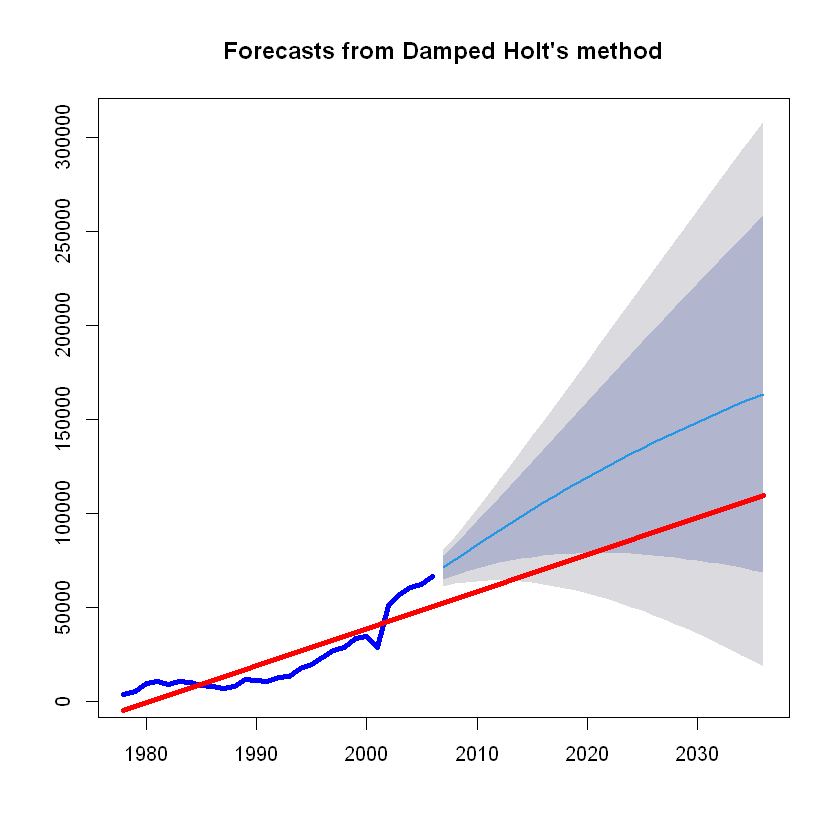

In [46]:
years=30
HM <- holt(subNH, h=years, damped=TRUE)
plot(HM, col='blue', lw=4)
x <- c(start(subNH)[1], end(subNH)[1] + years)
y <- predict(x)
lines(x, y, col='red', lw=4)

In [47]:
HM

     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2007       71270.77 64884.33  77657.20 61503.56  81037.98
2008       75438.43 67135.76  83741.10 62740.59  88136.27
2009       79522.74 69128.54  89916.93 63626.19  95419.29
2010       83525.36 70891.04  96159.68 64202.83 102847.89
2011       87447.93 72443.94 102451.92 64501.31 110394.55
2012       91292.05 73803.48 108780.62 64545.58 118038.51
2013       95059.28 74982.99 115135.57 64355.24 125763.32
2014       98751.17 75993.85 121508.49 63946.86 133555.49
2015      102369.23 76845.97 127892.48 63334.78 141403.68
2016      105914.92 77548.13 134281.70 62531.66 149298.17
2017      109389.70 78108.24 140671.16 61548.83 157230.56
2018      112794.98 78533.46 147056.50 60396.50 165193.46
2019      116132.16 78830.36 153433.95 59083.98 173180.33
2020      119402.59 79005.01 159800.17 57619.82 181185.36
2021      122607.61 79063.01 166152.22 56011.88 189203.34
2022      125748.54 79009.59 172487.49 54267.48 197229.59
2023      1288

## Logarithmic Linear Model

In [50]:
options(repr.plot.width=10, repr.plot.height=6)

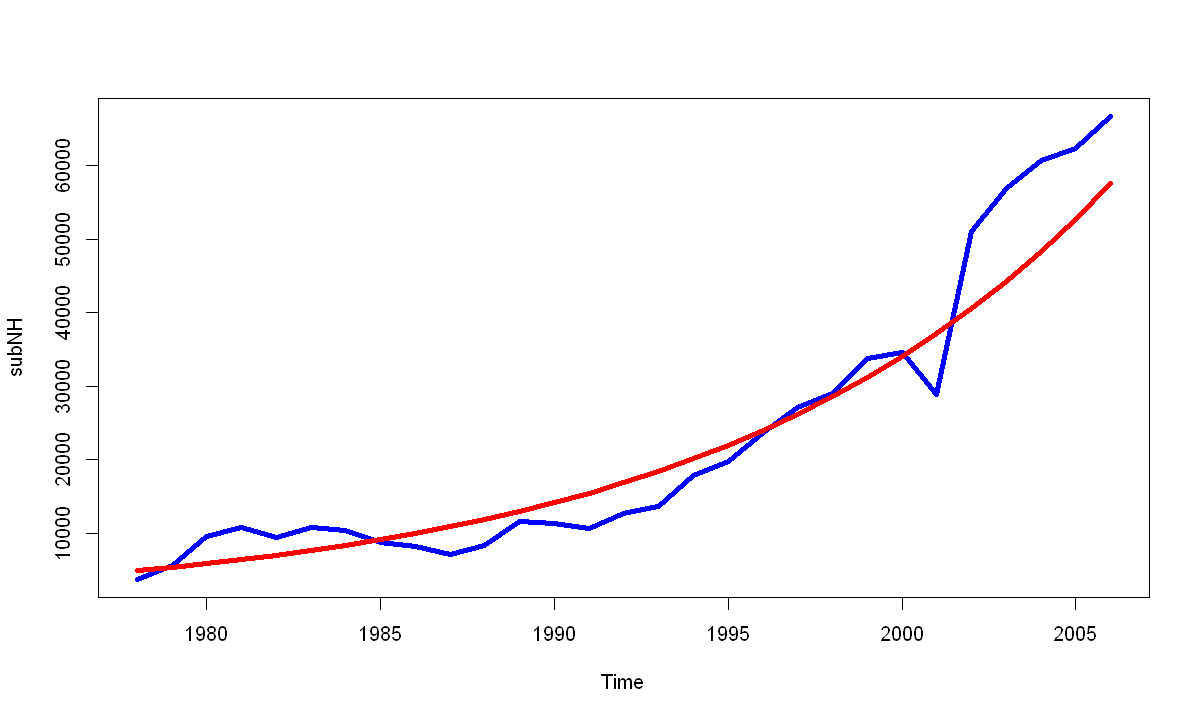

In [67]:
NH.LG.LM <- lm(log(subNH) ~ time(subNH))
plot(subNH, col='blue', lw=4)
x <- as.vector(time(subNH))
y <- exp(predict.lm(NH.LG.LM))
lines(x, y, col='red', lw=4)

In [68]:
NH.LG.LM


Call:
lm(formula = log(subNH) ~ time(subNH))

Coefficients:
(Intercept)  time(subNH)  
 -164.82467      0.08763  


Log-Linear model (RED)
Actual NewHouses Data (Blue)

In [69]:
summary(NH.LG.LM)


Call:
lm(formula = log(subNH) ~ time(subNH))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42843 -0.22241  0.01665  0.21842  0.51555 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.648e+02  1.162e+01  -14.18 4.99e-14 ***
time(subNH)  8.763e-02  5.836e-03   15.02 1.25e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2629 on 27 degrees of freedom
Multiple R-squared:  0.8931,	Adjusted R-squared:  0.8891 
F-statistic: 225.5 on 1 and 27 DF,  p-value: 1.253e-14


In [54]:
mean(exp(residuals(NH.LG.LM)))

[1] 1.033107

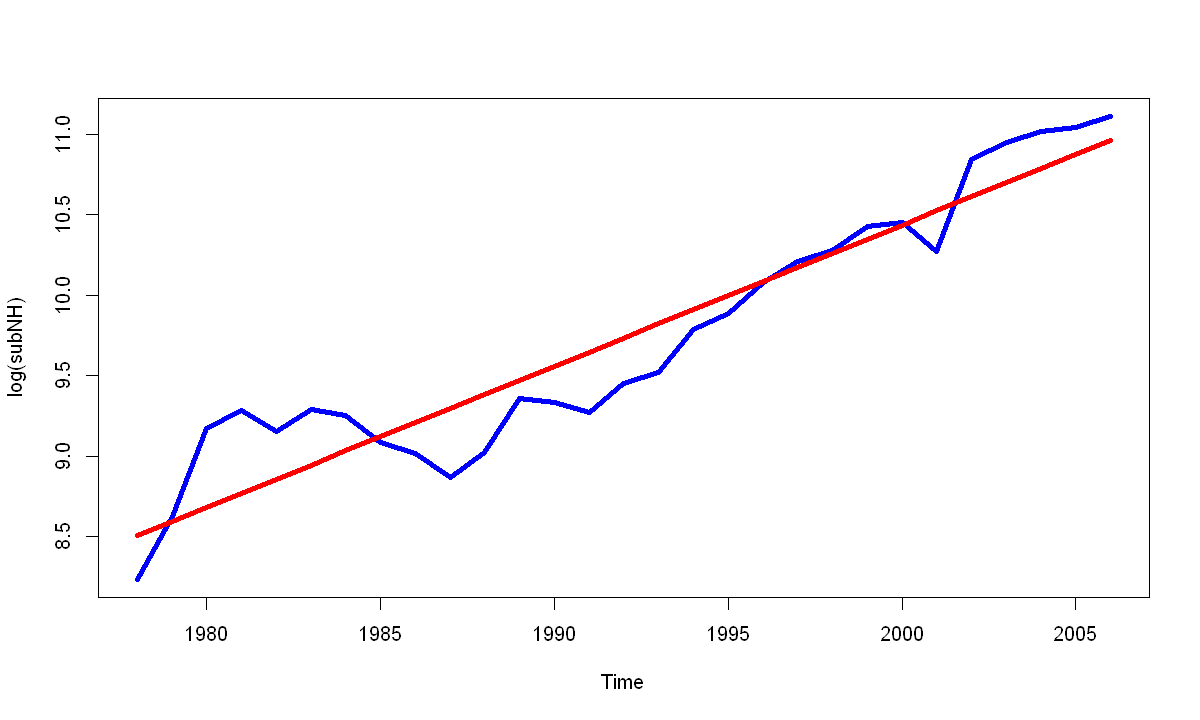

In [55]:
NH.LG.LG.LM <- lm(log(subNH) ~ time(subNH))
plot(log(subNH), col='blue', lw=4)
x <- as.vector(time(subNH))
y <- predict.lm(NH.LG.LG.LM)
lines(x, y, col='red', lw=4)

In [56]:
mean(exp(residuals(NH.LG.LG.LM)))

[1] 1.033107

In [57]:
summary(NH.LG.LM)


Call:
lm(formula = log(subNH) ~ time(subNH))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42843 -0.22241  0.01665  0.21842  0.51555 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.648e+02  1.162e+01  -14.18 4.99e-14 ***
time(subNH)  8.763e-02  5.836e-03   15.02 1.25e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2629 on 27 degrees of freedom
Multiple R-squared:  0.8931,	Adjusted R-squared:  0.8891 
F-statistic: 225.5 on 1 and 27 DF,  p-value: 1.253e-14


Same plot but in Logaritnmic scale

### Construct a Logarithmic Holt Model

In [70]:
years=3
LHM <- holt(log(subNH), h=years)

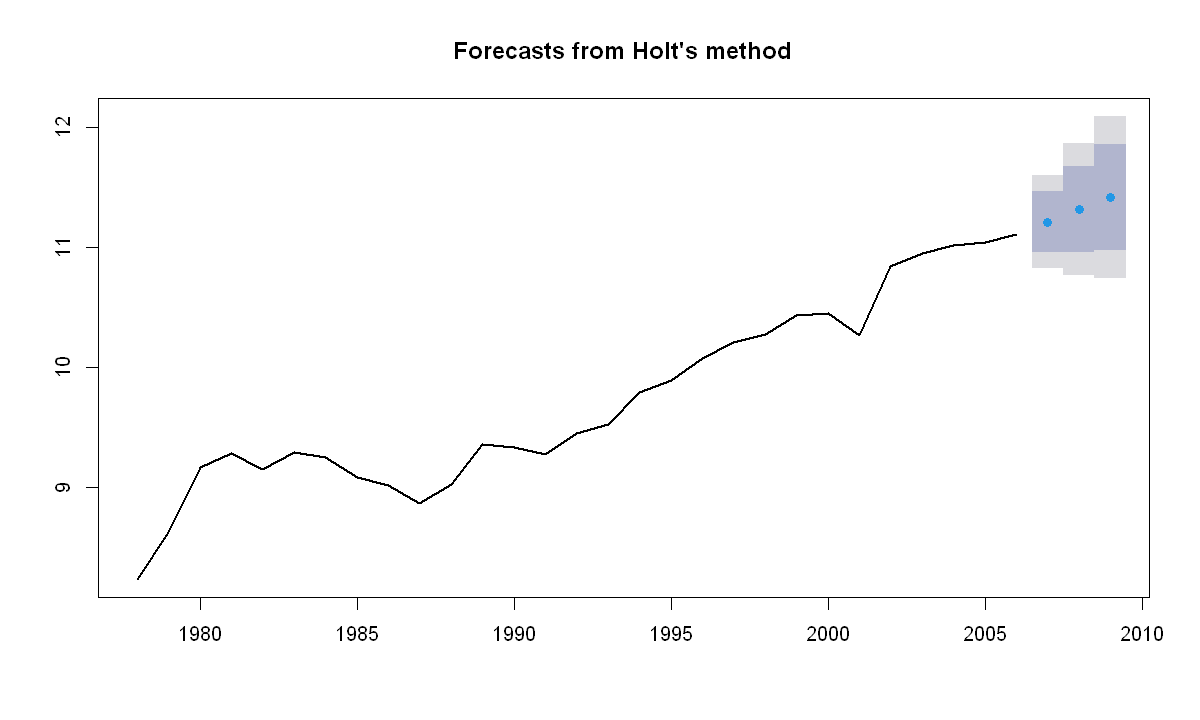

In [71]:
plot(LHM, lw=2)

In [72]:
summary(LHM)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = log(subNH), h = years) 

  Smoothing parameters:
    alpha = 0.9995 
    beta  = 1e-04 

  Initial states:
    l = 8.135 
    b = 0.1023 

  sigma:  0.198

      AIC      AICc       BIC 
 9.425787 12.034483 16.262266 

Error measures:
                       ME     RMSE       MAE          MPE     MAPE      MASE
Training set 0.0001782857 0.183866 0.1336921 -0.008439438 1.401606 0.8286366
                  ACF1
Training set 0.1079681

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2007       11.20952 10.95573 11.46331 10.82139 11.59765
2008       11.31183 10.95300 11.67066 10.76304 11.86061
2009       11.41413 10.97467 11.85359 10.74204 12.08623


In [73]:
mean(exp(residuals(LHM)))

[1] 1.018095

In [74]:
exp(LHM$mean)

A Time Series:
[1] 73829.98 81783.17 90593.11

### Overlay Between Logarithmic Holt Model and Log-Linear Model

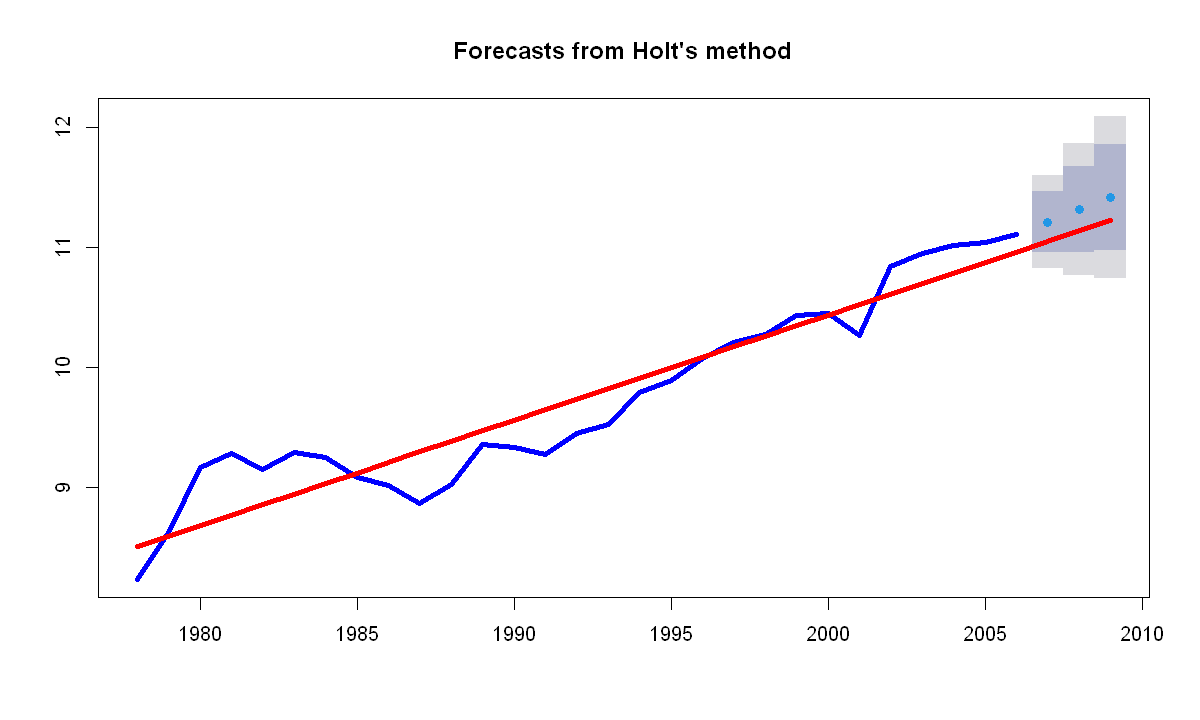

In [76]:
years <- 3
LHM <- holt(log(subNH), h=years)
predict <- function(t) {NH.LG.LG.LM$coefficients[[1]]+t*NH.LG.LG.LM$coefficients[[2]]}
plot(LHM, col='blue',lw=4)
x <- seq(start(subNH)[1], end(subNH)[1]+years)
y <- predict(x)
lines(x, y, col='red', lw=4)

In [77]:
mean(exp(residuals(LHM)))

[1] 1.018095

In [78]:
LHM

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2007       11.20952 10.95573 11.46331 10.82139 11.59765
2008       11.31183 10.95300 11.67066 10.76304 11.86061
2009       11.41413 10.97467 11.85359 10.74204 12.08623

In [79]:
exp(LHM$mean)

A Time Series:
[1] 73829.98 81783.17 90593.11

Forecasted Values

In [80]:
exp(LHM$mean)

A Time Series:
[1] 73829.98 81783.17 90593.11

In [81]:
summary(LHM)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = log(subNH), h = years) 

  Smoothing parameters:
    alpha = 0.9995 
    beta  = 1e-04 

  Initial states:
    l = 8.135 
    b = 0.1023 

  sigma:  0.198

      AIC      AICc       BIC 
 9.425787 12.034483 16.262266 

Error measures:
                       ME     RMSE       MAE          MPE     MAPE      MASE
Training set 0.0001782857 0.183866 0.1336921 -0.008439438 1.401606 0.8286366
                  ACF1
Training set 0.1079681

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2007       11.20952 10.95573 11.46331 10.82139 11.59765
2008       11.31183 10.95300 11.67066 10.76304 11.86061
2009       11.41413 10.97467 11.85359 10.74204 12.08623


### Comparison to Holt Model for Original Data

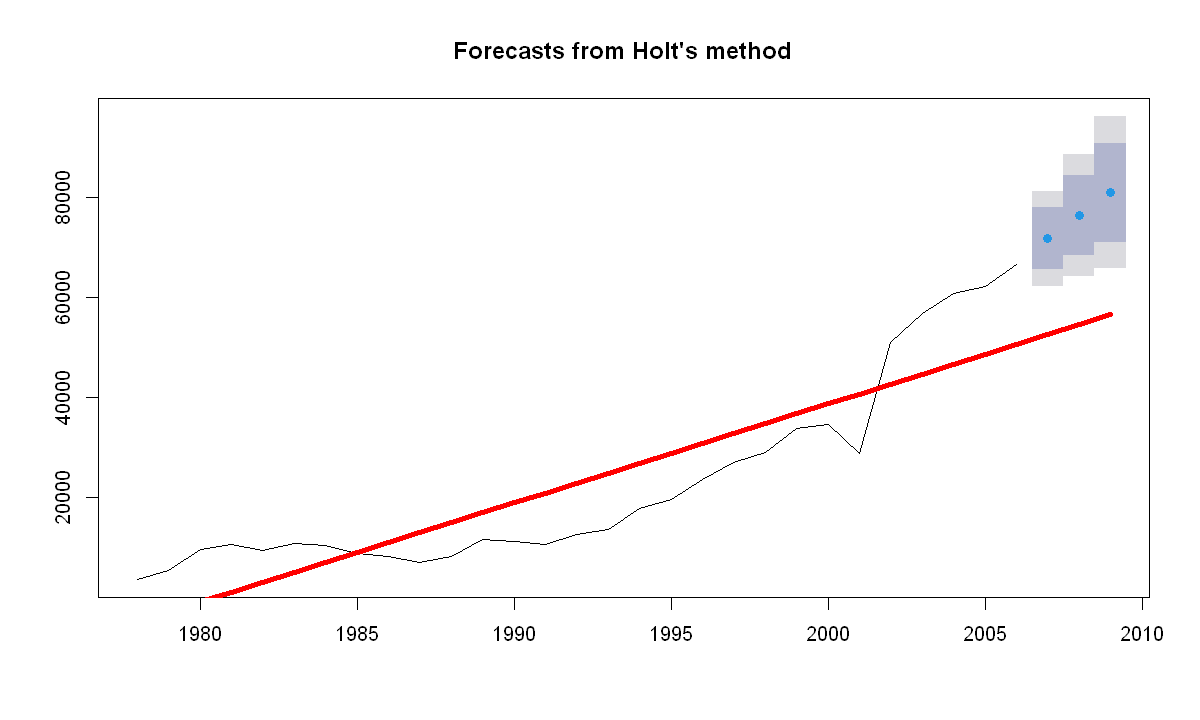

In [82]:
years <- 3
NHLM <- lm(subNH ~ time(subNH))
NHHM <- holt(subNH, h=years)
plot(NHHM)
predict <- function(t) {NHLM$coefficients[[1]]+t*NHLM$coefficients[[2]]}
x <- seq(start(subNH)[1], end(subNH)[1]+years)
y <- predict(x)
lines(x, y, col='red', lw=4)

In [83]:
NHHM$mean

A Time Series:
[1] 71750.48 76334.88 80919.28

## ARIMA

### Differencing

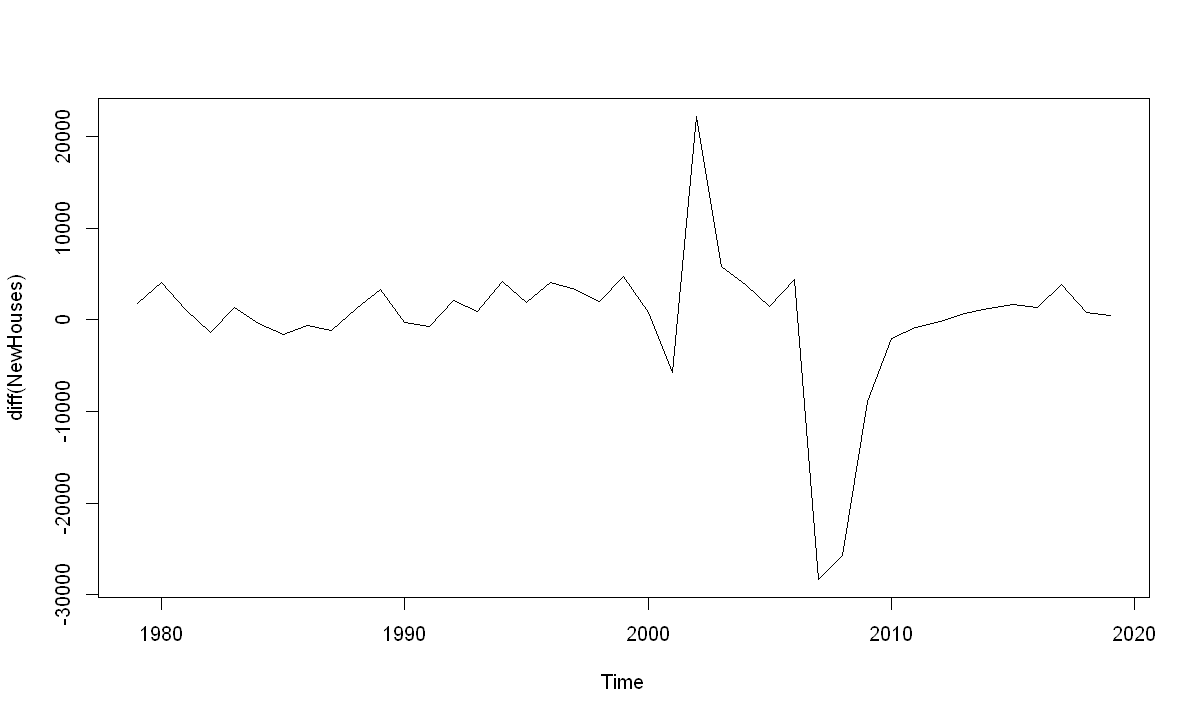

In [141]:
NH_diff = diff(NewHouses)
plot(diff(NewHouses))

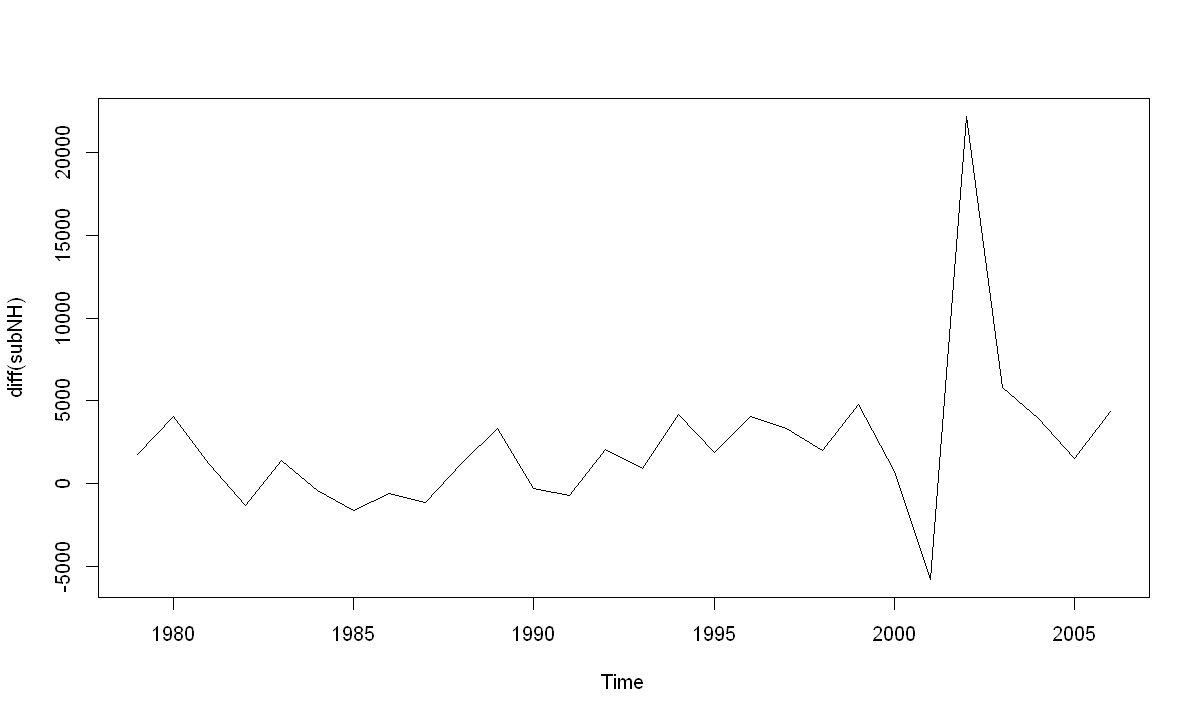

In [142]:
Window_diff = diff(subNH)
plot(diff(subNH))

In [144]:
mean(subNH)

[1] 22941.9

### Original Data Set


In [90]:
NH.arima.auto = auto.arima(NewHouses)

In [91]:
summary(NH.arima.auto)

Series: NewHouses 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2       mean
      1.3346  -0.4665  16791.106
s.e.  0.1315   0.1319   6985.181

sigma^2 estimated as 43317727:  log likelihood=-428.43
AIC=864.86   AICc=865.94   BIC=871.81

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 207.1252 6342.208 3464.418 -20.20197 35.95662 0.8732557
                     ACF1
Training set -0.007018081


In [92]:
NH.fcst.arima = forecast(NH.arima.auto, h=3)

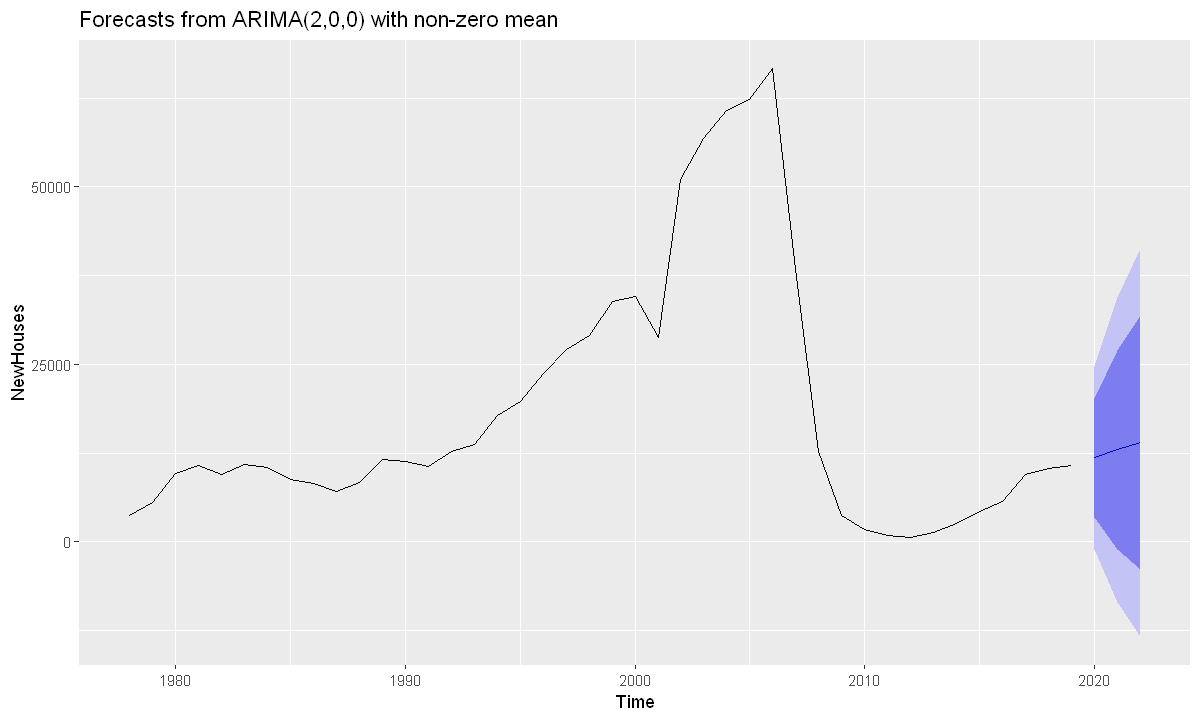

In [93]:
autoplot(NH.fcst.arima)

In [94]:
summary(NH.fcst.arima)


Forecast method: ARIMA(2,0,0) with non-zero mean

Model Information:
Series: NewHouses 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2       mean
      1.3346  -0.4665  16791.106
s.e.  0.1315   0.1319   6985.181

sigma^2 estimated as 43317727:  log likelihood=-428.43
AIC=864.86   AICc=865.94   BIC=871.81

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 207.1252 6342.208 3464.418 -20.20197 35.95662 0.8732557
                     ACF1
Training set -0.007018081

Forecasts:
     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020       11818.59  3383.902 20253.27  -1081.151 24718.33
2021       12957.23 -1109.161 27023.62  -8555.457 34469.91
2022       13994.20 -3917.264 31905.66 -13399.019 41387.42



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 6.8201, df = 5, p-value = 0.2344

Model df: 3.   Total lags used: 8



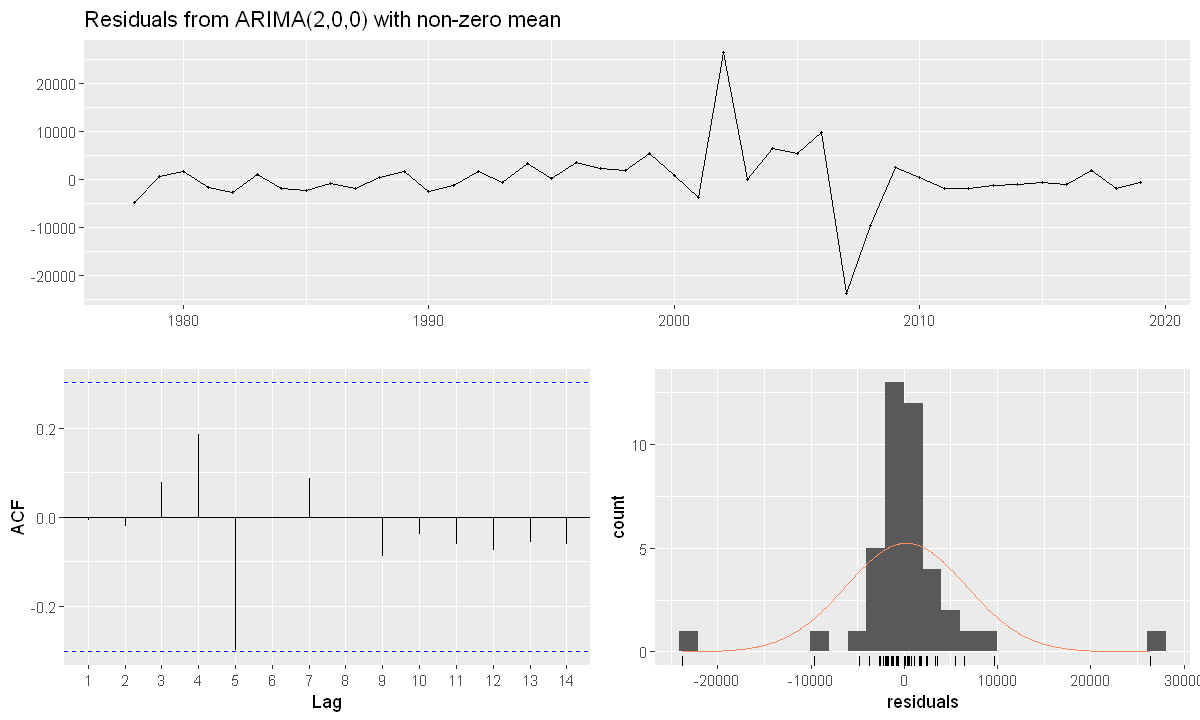

In [96]:
checkresiduals(NH.fcst.arima)

### Windows Dataset

In [84]:
arima.auto = auto.arima(subNH)

In [85]:
summary(arima.auto)

Series: subNH 
ARIMA(0,1,0) with drift 

Coefficients:
          drift
      2245.2857
s.e.   858.2239

sigma^2 estimated as 21387113:  log likelihood=-275.52
AIC=555.03   AICc=555.51   BIC=557.7

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.05295564 4462.302 2587.442 -7.42159 14.94795 0.8377666
                    ACF1
Training set -0.06004158


In [86]:
fcst.arima = forecast(arima.auto, h=3)

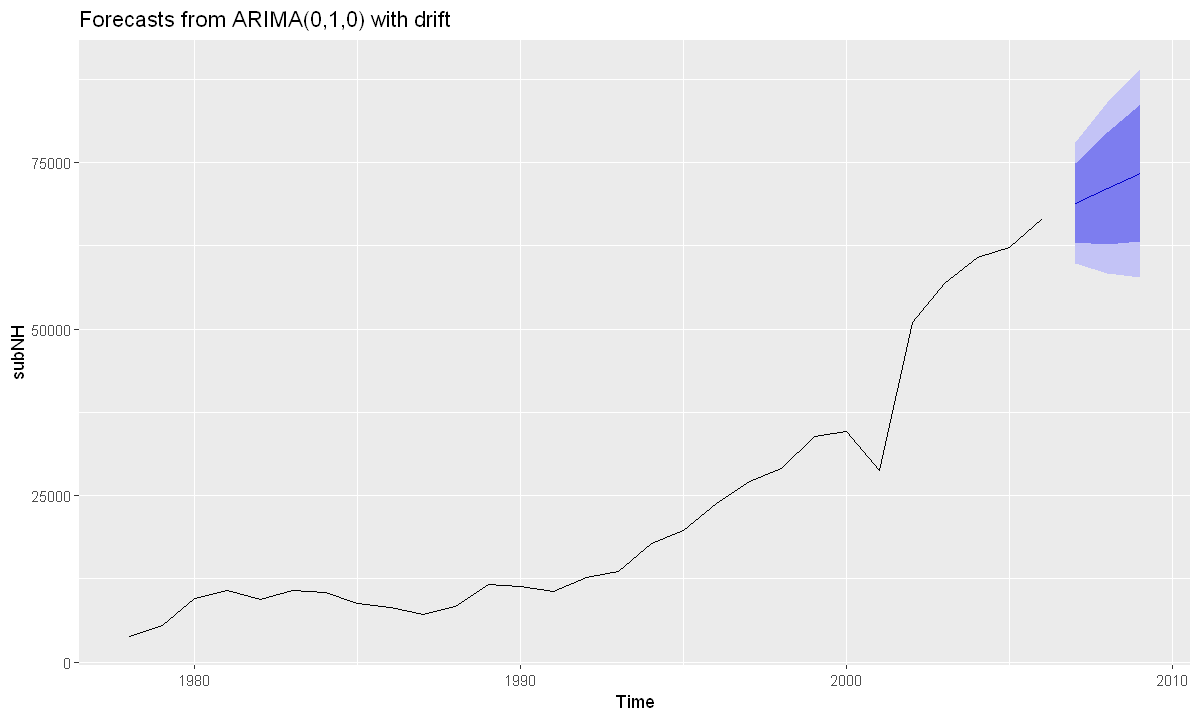

In [87]:
autoplot(fcst.arima)

In [88]:
summary(fcst.arima)


Forecast method: ARIMA(0,1,0) with drift

Model Information:
Series: subNH 
ARIMA(0,1,0) with drift 

Coefficients:
          drift
      2245.2857
s.e.   858.2239

sigma^2 estimated as 21387113:  log likelihood=-275.52
AIC=555.03   AICc=555.51   BIC=557.7

Error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.05295564 4462.302 2587.442 -7.42159 14.94795 0.8377666
                    ACF1
Training set -0.06004158

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2007       68894.29 62967.60 74820.98 59830.20 77958.37
2008       71139.57 62757.97 79521.18 58321.01 83958.13
2009       73384.86 63119.53 83650.18 57685.39 89084.32



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0) with drift
Q* = 1.2967, df = 5, p-value = 0.9353

Model df: 1.   Total lags used: 6



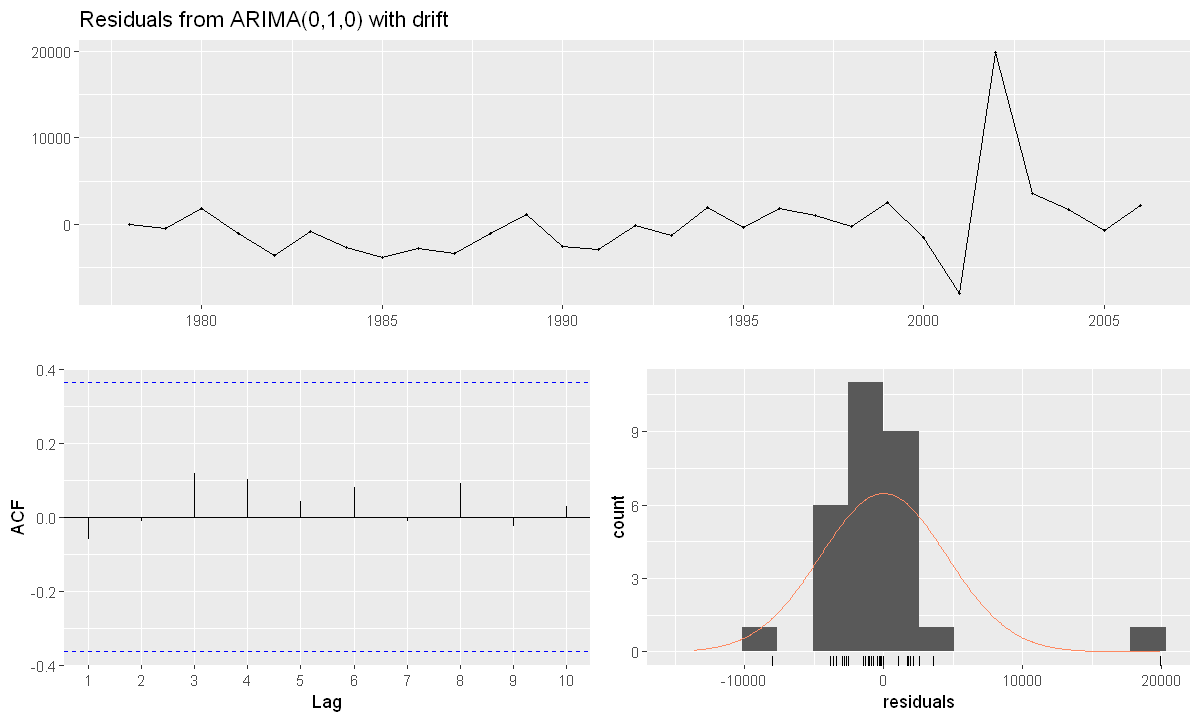

In [89]:
checkresiduals(fcst.arima)